# Предварительный, корреляционный и регрессионный анализ неоднородных данных

## Цели

В ходе предварительного анализа данных с помощью графических и статистических результатов определить, является ли модель моделью «случайная выборка»; исследовать закон ее распределения и проверить присутствие аномальных наблюдений.

В ходе корреляционного анализа данных с помощью графических и статистических результатов исследовать зависимости между случайными величинами. В ходе регрессионного анализа данных с помощью графических и статистических результатов исследовать влияние одних случайных величин на другие.

Оценка влияния неоднородности выборки на вероятностные свойства данных: закон распределения, корреляционные и регрессионные зависимости.

Сравнительный анализ результатов для однородной и неоднородной выборок.

## Постановка задачи

Для данных Фишера:

1) Провести кластерный анализ данных;

2) Провести предварительный анализ данных;

3) Провести корреляционный анализ данных;

4) Провести регрессионный анализ данных.

*Указание*: использовать выборки значений переменной SEPALLEN для всех видов ирисов;

# Результаты исследований

## Подключение необходимых библиотек и загрузка данных

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from scipy import stats
from scipy.stats import norm, skew, kurtosis, shapiro, chisquare, gaussian_kde, kstest, ttest_ind, spearmanr
from statistics import correlation
import statsmodels.api as sm

Выведем матрицу "объект-признак". В первом столбце находится зависимая переменная SEPALLEN, которую мы будем предсказывать, а в 2-4 столбцах находится независимые переменные SEPALWID, PETALLEN, PETALWID, которые будут являться обучающими для модели.

In [2]:
dataset = datasets.load_iris()

ext_target = dataset.target[:, None]
iris_data_frame = pd.DataFrame(
    np.concatenate((dataset.data, ext_target, dataset.target_names[ext_target]), axis=1),
    columns=['sepallen', 'sepalwid', 'petallen', 'petalwid', 'target_label', 'target_name'])
iris_data_frame

,sepallen,sepalwid,petallen,petalwid,target_label,target_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


## Предварительный анализ

Выделим зависимую случайную величину из всей выборки

In [4]:
sepallen_sample = iris_data_frame.sepallen.astype(float)
sepallen_sample

0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
      ... 
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: sepallen, Length: 150, dtype: float64

Также выделим весь набор переменных, с которыми мы будем работать

In [5]:
variables = iris_data_frame[['sepallen', 'sepalwid', 'petallen', 'petalwid']].astype(float)
variables

,sepallen,sepalwid,petallen,petalwid
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


### Проверка нормальности распределения переменной SEPALLEN

Выдвинем гипотезу $$H_0=\{ \text{случайная величина SEPALLEN распределена нормально} \}.$$ Проверим, можем ли мы принять эту гипотезу. Для проверки гипотезы о нормальности распределения построим гистограмму распределения.

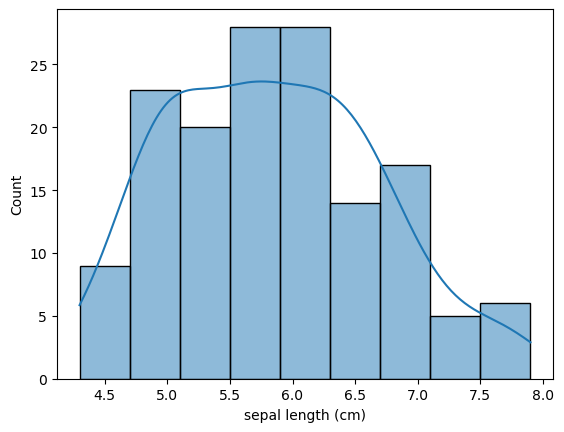

In [7]:
sns.histplot(data=sepallen_sample, kde=True)
None

Проанализируем построенную гистограмму:

•	гистограмма унимодальная;

•	на гистограмме присутствует неярко выраженная асимметрия;

•	“хвосты” гистограммы не выходят существенно за границы трёх сигм;

•	за пределами границ трёх сигм отсутствуют изолированные наблюдения (то есть нет аномальных наблюдений).

Таким образом, на данном этапе у нас нет причин отклонить гипотезу о нормальности распределения исследуемой случайной величины.

Проведем анализ дескриптивных статистик.

In [7]:
desc_stats = pd.DataFrame(pd.concat([sepallen_sample.describe(), 
                        pd.Series(data=sepallen_sample.median(), index=['median']), 
                        pd.Series(data=sepallen_sample.mode()[0], index=['mode']),
                        pd.Series(data=skew(sepallen_sample, bias=False), index=['skewness']), 
                        pd.Series(data=kurtosis(sepallen_sample, bias=False), index=['kurtosis']) ]), 
                        columns=['sepallen']).T
desc_stats

,count,mean,std,min,25%,50%,75%,max,median,mode,skewness,kurtosis
sepallen,150.0,5.843333,0.828066,4.3,5.1,5.8,6.4,7.9,5.8,5.0,0.314911,-0.552064


Анализ показывает, что

•	среднее и медиана распределения выборки имеют близкие значения;

•	близко к нулю значения коэффициента асимметрии (skewness), причем значение положительно, поэтому выборка смещена влево;

•	близко к нулю значение коэффициента эксцесса (kurtosis), причем оно отрицательное, поэтому гистограмма имеет более пологую вершину;

•	выполняется правило трёх сигмовых границ, то есть большинство значений лежит в пределах трёх сигм влево и вправо;

Исследуем наличие аномальных наблюдений с помощью графика «ящик с усами». 

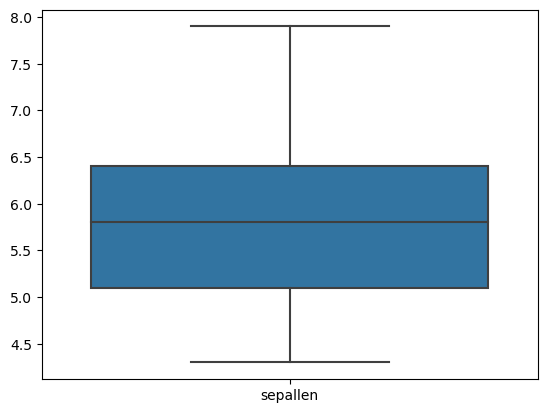

In [9]:
sns.boxplot(data=pd.DataFrame(sepallen_sample))
None

На графике можно заметить положительную асимметрия в чем мы убедились ранее. На этом графике отсутствуют аномальные наблюдения, о чем говорит отсутствие значений за пределами “усов”. Параметры “ящика с усами” соответствуют нормальному распределению. Следовательно, мы всё так же не можем отклонить гипотезу о нормальности распределения.

Проведем проверку предположения о нормальности распределения, с помощью графика “квантиль-квантиль”.

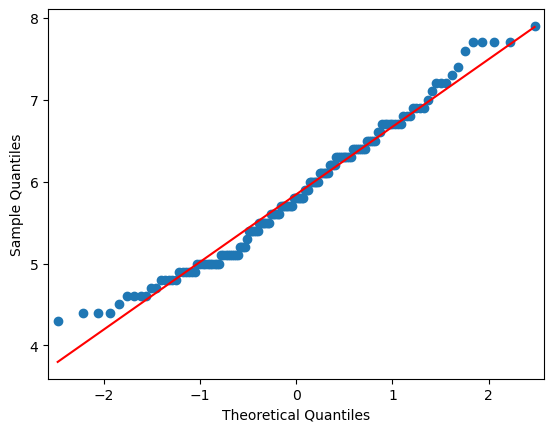

In [10]:
fig = sm.qqplot(sepallen_sample, line='s')
plt.show()

График показывает, что большая часть наблюдений в выборке близки к линии нормального распределения. На концах заметны несущественные отклонения. Однако они не позволяют нам отклонить гипотезу о нормальности распределения. 

В заключение для проверки выборки на нормальность используем критерии согласия Колмогорова-Смирнова и $\chi^2$-Пирсона. Если P-значения этих критериев будут больше, чем 0.05, то мы не отклоним гипотезу о нормальности распределения. 


In [11]:
expected = norm(loc=sepallen_sample.mean(), scale=sepallen_sample.std()).rvs(size=150)
ks_test = kstest(sepallen_sample, expected)
chis_test = chisquare(f_obs=sepallen_sample.value_counts(), ddof=0, axis=None)
print('Kolmogorov-Smirnov test: ' + str(ks_test.pvalue))
print('Chi-Square test: ' + str(chis_test.pvalue))

Kolmogorov-Smirnov test: 0.4425235033915137
Chi-Square test: 0.003872724868604134


Критерий Колмогорова-Смирнова свидетельствует в пользу нормальности распределения данной случайной величины, так как все они имеют P-значение больше 0.05. 

Таким образом, по совокупности признаков мы можем принять гипотезу о нормальности исследуемого распределения случайной величины SEPALLEN, так как ни на одном из этапов мы не убедились в обратном. То есть выборка наблюдений случайной величины SEPALLEN для ирисов вида SETOSA является случайной выборкой из нормального распределения.

## Корреляционный анализ неоднородных данных

Выяснив, что переменная SEPALLEN распределена нормально, будем проводить корреляционный анализ линейной взаимосвязи зависимой переменной с независимыми для того, чтобы мы могли построить линейную модель для предсказания значений зависимой переменной. Целью корреляционного анализа является отыскание независимых переменных, имеющих ненулевую корреляцию с зависимой переменной.

Для того чтобы увидеть общую картину построим матрицу диаграмм рассеяния.

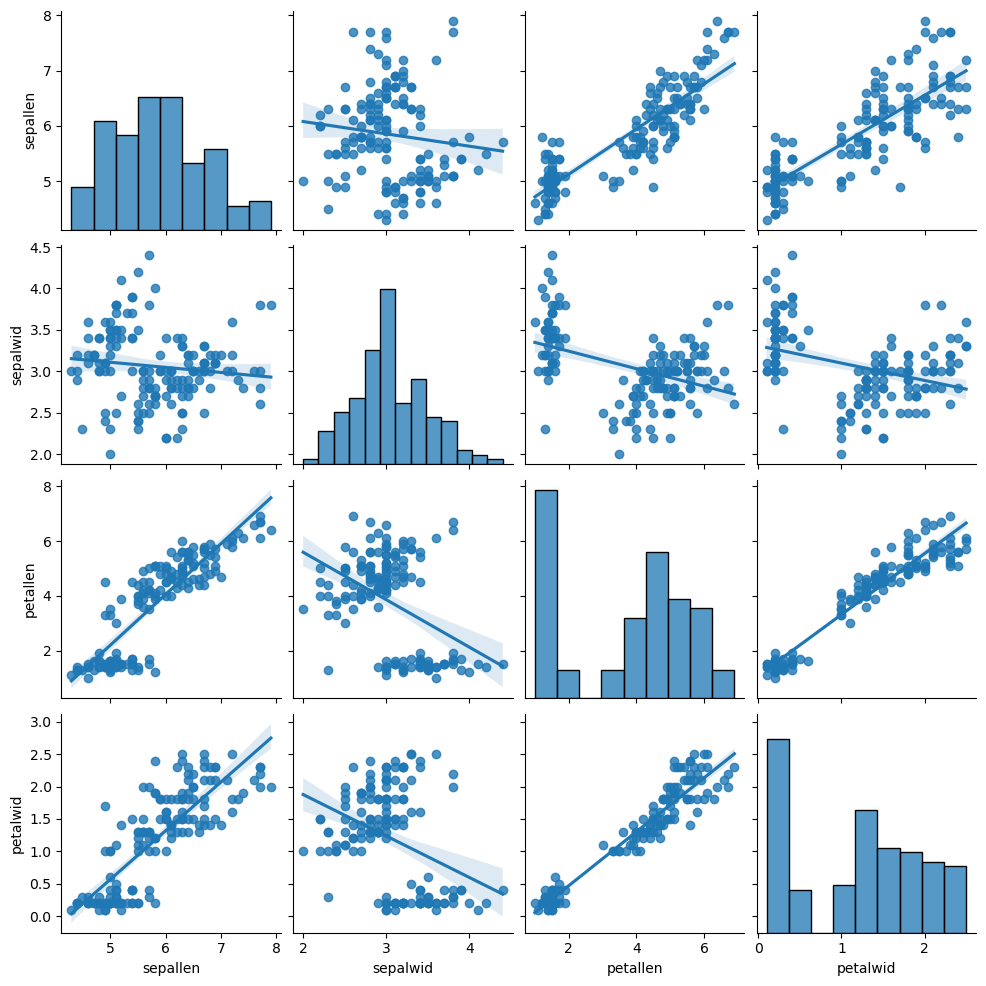

In [12]:
sns.pairplot(data=variables, kind='reg', diag_kind='auto')
None

На графике хорошо просматривается корреляция между случайными величинами SEPALLEN с PETALLEN и PETALWID. Отчетливая связь между SEPALLEN и SEPALWID не прослеживается.

Для более точной характеристики проведем по-отдельности исследование корреляции между исследуемыми случайными величинами.

Для оценки коэффициента корреляции между случайными величинами мы будем пытаться использовать коэффциент корреляции Пирсона, а гипотезу о равенстве истинной корреляции нулю будем проверять с помощью критерия Стъюдента. Для того, чтобы применить это, нам необходимо выполнение следующих условий:

1. Исследуемые переменные X и Y должны быть распределены нормально;

2. Исследуемые переменные X и Y должны быть измерены в интервальной шкале или шкале отношений;

3. Количество значений в исследуемых переменных X и Y должно быть одинаковым.

Условия 2 и 3 очевидно выполняются. Поэтому для применения коэффициента Пирсона нам необходимо выполнение условия 1, то есть его проверку мы и будем проводить. Причем нам известно, что во всех случаях одна из переменных (SEPALLEN) распределена нормально. Поэтому при рассмотрении парной корреляции нам необходимо, чтобы вторая из рассматриваемых переменных была распределена нормально. Если же это не так, то мы будем использовать коэффициент корреляции Спирмена и соответственно гипотезу о равенстве истинной корреляции нулю будем проверять с помощью критерия Спирмена.

### Корреляция между SEPALLEN и SEPALWID

Для исследования корреляции между случайными величинами SEPALLEN и SEPALWID построим диаграмму рассеяния 

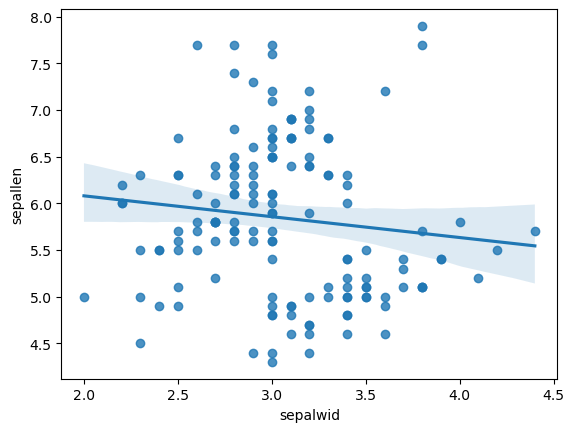

In [25]:
sns.regplot(x='sepalwid', y='sepallen', data=variables)
None

На графике не заметно четкой взаимосвязи между этими переменными. Проверим, является ли распределение переменной SEPALWID нормальным. Видвинем гипотезу $$H_0=\{ \text{случайная величина SEPALWID распределена нормально} \}.$$ Построим гистограмму распределения этой случайной величины.

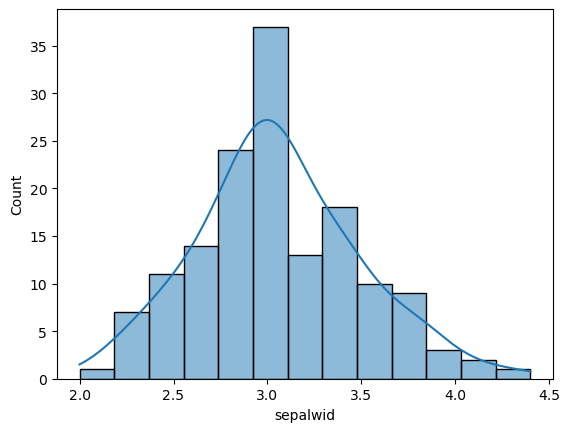

In [20]:
sns.histplot(data=variables.sepalwid, kde=True)
None

Гистограмма распределения унимодальна, отсутствует ярко выраженная асимметрия. График ядерной оценки плотность схож с графиком нормального распределения, поэтому не отклоняем гипотезу о нормальности распределения.

Применим критерий Колмогорова-Смирнова.

In [22]:
expected = norm(loc=variables.sepalwid.mean(), scale=variables.sepalwid.std()).rvs(size=150)
ks_test = kstest(variables.sepalwid, expected)
print('Kolmogorov-Smirnov test: ' + str(ks_test.pvalue))

Kolmogorov-Smirnov test: 0.18039483841127182


P-значение критерия $ > 0.05$, поэтому мы не отклоняем гипотезу о нормальности распределения. Теперь выдвинем гипотезу 
$$H_0=\{ \text{истинная корреляция между SEPALLEN и SEPALWID равна нулю} \}.$$
Для проверки этой гипотезу воспользуемся критерим Стъюдента. Для оценки коэффициента корреляции воспользуемся оценкой Пирсона.

In [23]:
ttest_result = stats.ttest_ind(variables.sepallen, variables.sepalwid)
print('T-test P-value: ' + str(ttest_result.pvalue))

corr = correlation(variables.sepallen, variables.sepalwid)
print('pearson correlation coefficient: ' + str(corr))

T-test P-value: 7.027919392009369e-112
pearson correlation coefficient: -0.11756978413300204


Р-значение t-критерия Стъюдента $ <0.05$, поэтому отклоняем гипотезу $H_0$ и считаем рассматриваемый коэффициент парной корреляции по Пирсону. То есть $$corr (SEPALLEN, SEPALWID) = -0.118$$
Таким образом, у нас имеется отрицательная линейная взаимосвязь между переменными SEPALLEN и SEPALWID. То есть этот признак мы можем учитывать при потсроении линейной модели.

### Корреляция между SEPALLEN и PETALLEN

Для исследования корреляции между случайными величинами SEPALLEN и PETALLEN построим диаграмму рассеяния

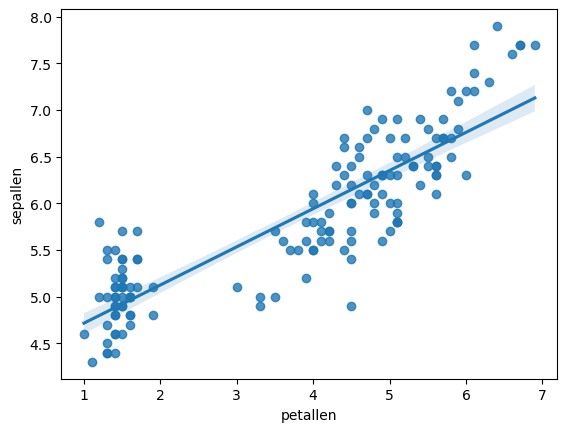

In [24]:
sns.regplot(x='petallen', y='sepallen', data=variables)
None

На графике заметно, что при возрастании значения PETALLEN возрастает также и значени переменной SEPALLEN. Проверим, является ли распределение переменной PETALLEN нормальным. Видвинем гипотезу $$H_0=\{ \text{случайная величина PETALLEN распределена нормально} \}.$$ Построим гистограмму распределения этой случайной величины.

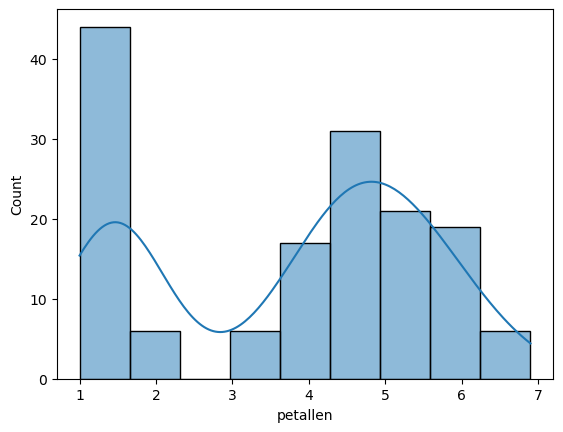

In [26]:
sns.histplot(data=variables.petallen, kde=True)
None

Гистограмма распределения бимодальна. Это происходит из-за наличия кластерной структуры в рассматрвиаемых данных. На данном этапе мы уже можем предполагать, что гипотеза будет отклонена.

Применим критерий Колмогорова-Смирнова.

In [29]:
expected = norm(loc=variables.petallen.mean(), scale=variables.petallen.std()).rvs(size=150)
ks_test = kstest(variables.petallen, expected)
print('Kolmogorov-Smirnov test: ' + str(ks_test.pvalue))

Kolmogorov-Smirnov test: 0.00033473405864338295


Р-значение критерия Колмогорова-Смирнова $<0.05$, поэтому мы можем отклонить гипотезу $H_0$. Теперь выдвинем гипотезу 
$$H_0=\{ \text{истинная корреляция между SEPALLEN и PETALLEN равна нулю} \}.$$
Для проверки этой гипотезу воспользуемся критерием Спирмена. Для оценки коэффициента корреляции воспользуемся оценкой по Спирмену.

In [31]:
rho, p = spearmanr(variables.sepallen, variables.petallen)
print('spearman P-value: ' + str(p))
print('spearman correlation coefficient: ' + str(rho))

spearman P-value: 3.4430872780470036e-50
spearman correlation coefficient: 0.881898126434986


Р-значение критерия Спирмена $ <0.05$, поэтому отклоняем гипотезу $H_0$ и считаем рассматриваемый коэффициент парной корреляции по Спирмену. То есть $$corr (SEPALLEN, PETALLEN) = 0.881$$
Таким образом, у нас имеется положительная достаточно сильная линейная взаимосвязь между переменными SEPALLEN и PETALLEN. Таким образом, этот признак мы можем учитывать при потсроении линейной модели.

### Корреляция между SEPALLEN и PETALWID

Для исследования корреляции между случайными величинами SEPALLEN и PETALWID построим диаграмму рассеяния

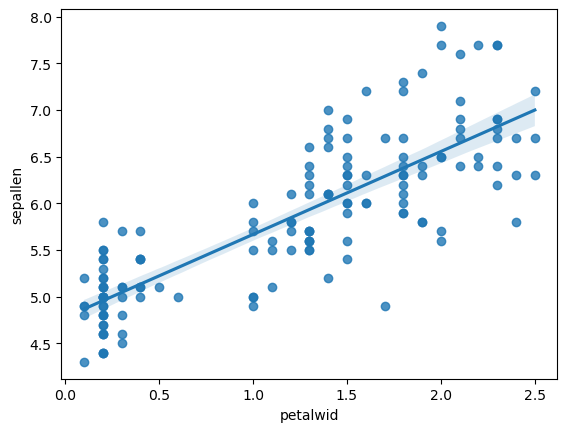

In [32]:
sns.regplot(x='petalwid', y='sepallen', data=variables)
None

На графике заметно, что при возрастании значения PETALWID возрастает также и значени переменной SEPALLEN. Проверим, является ли распределение переменной PETALWID нормальным. Видвинем гипотезу $$H_0=\{ \text{случайная величина PETALWID распределена нормально} \}.$$ Построим гистограмму распределения этой случайной величины.

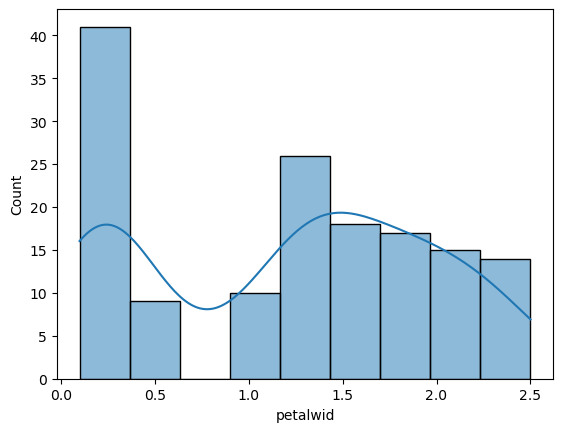

In [33]:
sns.histplot(data=variables.petalwid, kde=True)
None

Гистограмма распределения бимодальна. Это происходит из-за наличия кластерной структуры в рассматрвиаемых данных. На данном этапе мы уже можем предполагать, что гипотеза будет отклонена.

Применим критерий Колмогорова-Смирнова.

In [34]:
expected = norm(loc=variables.petalwid.mean(), scale=variables.petalwid.std()).rvs(size=150)
ks_test = kstest(variables.petalwid, expected)
print('Kolmogorov-Smirnov test: ' + str(ks_test.pvalue))

Kolmogorov-Smirnov test: 0.0048579332350668775


Р-значение критерия Колмогорова-Смирнова $<0.05$, поэтому мы можем отклонить гипотезу $H_0$. Теперь выдвинем гипотезу 
$$H_0=\{ \text{истинная корреляция между SEPALLEN и PETALWID равна нулю} \}.$$
Для проверки этой гипотезу воспользуемся критерием Спирмена. Для оценки коэффициента корреляции воспользуемся оценкой по Спирмену.

In [36]:
rho, p = spearmanr(variables.sepallen, variables.petalwid)
print('spearman P-value: ' + str(p))
print('spearman correlation coefficient: ' + str(rho))

spearman P-value: 4.1894466773905186e-40
spearman correlation coefficient: 0.8342887759080051


Р-значение критерия Спирмена $ <0.05$, поэтому отклоняем гипотезу $H_0$ и считаем рассматриваемый коэффициент парной корреляции по Спирмену. То есть $$corr (SEPALLEN, PETALWID) = 0.834$$
Таким образом, у нас имеется положительная достаточно сильная линейная взаимосвязь между переменными SEPALLEN и PETALWID. Таким образом, этот признак мы можем учитывать при потсроении линейной модели.

## Регрессионный анализ неоднородных данных

Проведем регрессионный анализ влияния факторов SEPALWID, PETALLEN, PETALWID на поведение переменной SEPALLEN, чтобы построить регрессионную модель для предсказания поведения зависимой переменной SEPALLEN. Для проведения регрессионного анализа нам необходимо выполнение следующих условий:

1. Линейная зависимость переменных;

2. Нормальное распределение остатков;

3. Гетероскедастичность;

4. Проверка на мультиколлинеарность;

5. Нормальное распределение переменных;

Линейная зависимость и нормальное распределение переменных следует непосредственно из корреляционного анализа. Остатки мы исследуем после построения регрессионной модели.

Для повышения качества модели сперва исключим мультиколлинеарные факторы. Чтобы найти мультиколлинеарные факторы (независимые переменные с сильной корреляционной связью $(> 0.7)$) построим корреляционную матрицу.

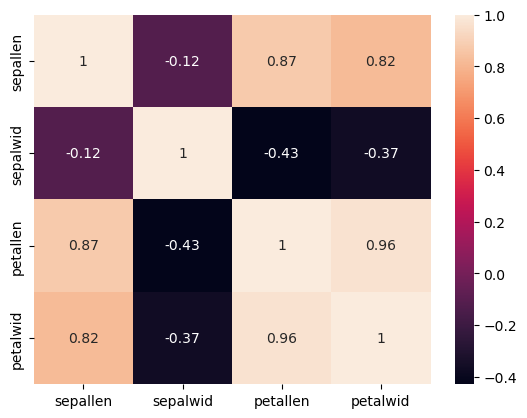

In [37]:
sns.heatmap(variables.corr(), annot = True)
None

Среди нашей выборки присутствуют мультиколлинеарные факторы: PETALLEN и PETALWID. Нам необходимо исключить один из них при построении нашей модели. Построим линейную модель в следующем виде:
$$sepallen = w_0 + w_1 \cdot sepalwid + w_2 \cdot petallen + w_3 \cdot petalwid.$$
Оба имеют сильную положительную линейную взаимосвязь с зависимоей переменной. Выдвигаем три гипотезы (или одну вектор-гипотезу):
$$H^1_0 = \{w_1 = 0\},$$
$$H^2_0 = \{w_2 = 0\},$$
$$H^3_0 = \{w_3 = 0\}.$$
С помощью МНК построим модель линейной регрессии и проверим Р-значение для выдвинутых гипотез. Среди признаков PETALLEN и PETALWID мы исключим тот, Р-значение которого меньше.

In [39]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
y=variables.sepallen.astype(float)
X=iris_data_frame[['sepalwid', 'petallen', 'petalwid']].astype(float)
X = sm.add_constant(X)
sm.OLS(y, X).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               sepallen   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     295.5
Date:                Sat, 23 Dec 2023   Prob (F-statistic):           8.59e-62
Time:                        18:55:06   Log-Likelihood:                -37.321
No. Observations:                 150   AIC:                             82.64
Df Residuals:                     146   BIC:                             94.69
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.8560      0.251      7.401      0.000       1.360       2.352
sepalwid       0.6508      0.067      9.765      0.000       0.519       0.783
petallen       0.7091      0.057     12.502      0.000       0.597       0.821
petalwid      -0.5565      0.128     -4.363      0.000      -0.809      -0.304
==============================================================================
Omnibus:                        0.345   Durbin-Watson:                   2.060
Prob(Omnibus):                  0.842   Jarque-Bera (JB):                0.504
Skew:                           0.007   Prob(JB):                        0.777
Kurtosis:                       2.716   Cond. No.                         54.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:
print('PETALLEN P-value:', results.pvalues.loc['petallen'])
print('PETALWID P-value:', results.pvalues.loc['petalwid'])

PETALLEN P-value: 7.656980454117716e-25
PETALWID P-value: 2.412875686118021e-05


Р-значение PETALLEN ниже, поэтому эту переменную исключим из выборки. Перестроим матрицу корреляции, чтобы проверить, нет ли мультиколлинеарности

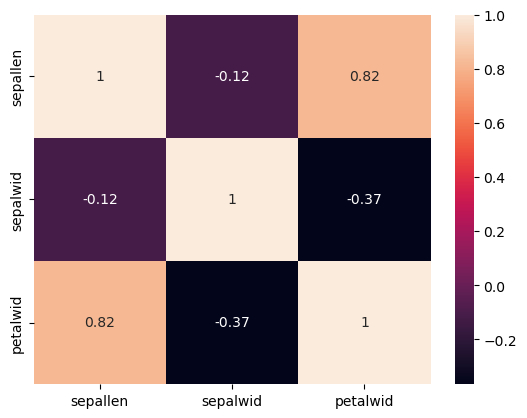

In [42]:
variables = iris_data_frame[['sepallen', 'sepalwid', 'petalwid']].astype(float)
sns.heatmap(variables.corr(), annot = True)
None

Коллинеарных признаков нет, поэтому перестроим линейную модель:
$$sepallen = w_0 + w_1 \cdot sepalwid + w_2 \cdot petalwid.$$
Оба имеют сильную положительную линейную взаимосвязь с зависимоей переменной. Выдвигаем три гипотезы (или одну вектор-гипотезу):
$$H^1_0 = \{w_1 = 0\},$$
$$H^2_0 = \{w_2 = 0\}.$$
С помощью МНК построим модель линейной регрессии и проверим Р-значение для выдвинутых гипотез. Среди признаков PETALLEN и PETALWID мы исключим тот, Р-значение которого меньше.

In [43]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
y=variables.sepallen
X=iris_data_frame[['sepalwid', 'petalwid']].astype(float)
X = sm.add_constant(X)
results = sm.OLS(y, X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               sepallen   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.703
Method:                 Least Squares   F-statistic:                     177.6
Date:                Sat, 23 Dec 2023   Prob (F-statistic):           6.15e-40
Time:                        18:59:45   Log-Likelihood:                -91.910
No. Observations:                 150   AIC:                             189.8
Df Residuals:                     147   BIC:                             198.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.4573      0.309     11.182      0.000       2.846       4.068
sepalwid       0.3991      0.091      4.380      0.000       0.219       0.579
petalwid       0.9721      0.052     18.659      0.000       0.869       1.075
==============================================================================
Omnibus:                        2.095   Durbin-Watson:                   1.877
Prob(Omnibus):                  0.351   Jarque-Bera (JB):                1.677
Skew:                           0.239   Prob(JB):                        0.432
Kurtosis:                       3.198   Cond. No.                         30.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Обе выдвинутые гипотезы не отклоняются. 

Также при составлении таблицы с уровнями значимости для коэффициентов регрессии была составлена таблица, из которой мы выясняем, что значение коэффициента детерминации в данном случае $R=0.55$, то есть примерно $55%$ изменчивости зависимой переменной объясняется построенной моделью. Также была вычислена F-статистика и соответствующее Р-значение для построенной модели. Это позволяет нам принять гипотезу о том, что наша модель в принципе позволяет нам объяснить поведение нашей зависимой переменной.

### Анализ остатков линейной модели

Для предварительного анализа качества модели и применимости регрессионного анализа проведем анализ остатков (разностей фактических значений отклика и значений, предсказанных по уравнению регрессии).
	
Построим модель линейной регрессии и обучим её на нашей выборке, где SEPALLEN зависимая переменная, а SEPALWID и PETALWID – независимые переменные. После этого попробуем предсказать значения с помощью построенной модели. Полученные с помощью МНК коэффициенты зададим в линейную модель. Теперь модель будет иметь вид
$$sepallen = 3.4573 + 0.3991 \cdot sepalwid + 0.9721 \cdot petalwid.$$

In [44]:
linreg = LinearRegression()
linreg.fit(X, y)
predicted_values = linreg.predict(X)
residuals = (variables.sepallen.to_numpy().T - predicted_values.T).T

Вычислим остатки, отняв от реальных значений SEPALLEN значения, предсказанные нашей моделью. Проведем проверку распределения остатков на нормальность, выдвинув гипотезу $$H_0 = \{\text{распределение остатков нормальное}\}.$$ Для этого построим гистограмму распределения остатков.

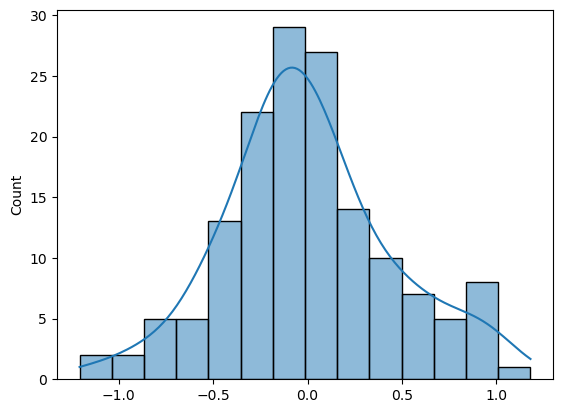

In [47]:
residuals = pd.Series(residuals.T[0])
sns.histplot(data=residuals, kde=True)
None

Гистограмма унимодальна и на ней отсутствует ярко выраженная асимметрия, поэтому гипотеза о нормальности не отклоняется.

Для более полного изучения построим нормально-вероятностный график остатков.

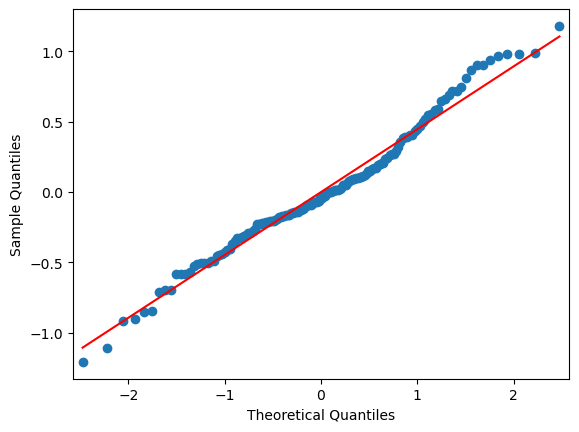

In [49]:
fig = sm.qqplot(pd.Series(residuals), line='s')
plt.show()

График показывает, что систематических отклонений фактических данных от теоретической нормальной прямой не наблюдается.
Гипотезу проверим по критерию Колмогорова-Смирнова.

In [36]:
expected = norm(loc=residuals.mean(), scale=residuals.std()).rvs(size=150)
ks_test = kstest(residuals, expected)
chis_test = chisquare(f_obs=residuals.value_counts(), ddof=0, axis=None)
print('Kolmogorov-Smirnov test: ' + str(ks_test.pvalue))

Kolmogorov-Smirnov test: 0.30394054313029384


Р-значение полученное по критерию Колмогорова-Смирнова $<0.05$, поэтому принимаем гипотезу о том, что распределение остатков нормальное.

Проверим отсутствие зависимости остатков от предсказанных по уравнению регрессии значений отклика. Для этого построим диаграмму рассеяния предсказанных значений SEPALLEN от остатков.

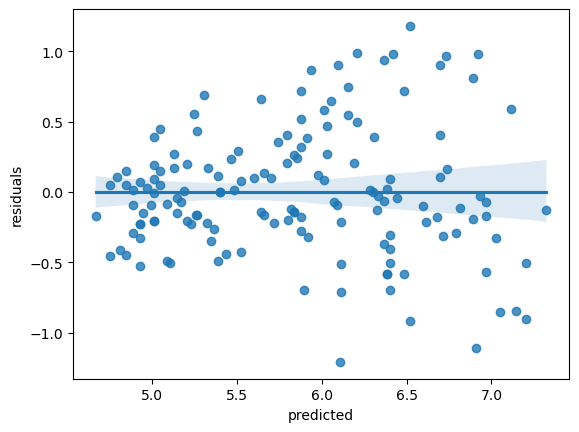

In [37]:
predicted_residuals = pd.concat([residuals, 
                                              pd.Series(data=predicted_values.T[0])], axis=1,
                               keys= ['residuals', 'predicted'])
sns.regplot(
    x='predicted', 
    y='residuals', 
    data=predicted_residuals)
None

На этом графике мы можем посмотреть на соотношение остатков и предсказанных значений. Нетрудно заметить, что точки не имеют системности в своем расположении. Соответственно, мы можем сказать, что остатки не зависят от предсказанных значений.

Оба условия выполнены. Следовательно, анализ остатков показал, что модель достаточно качественная. В заключение оценим приемлемость модели в целом с помощью двухфакторного дисперсионного анализа. В двухфакторном дисперсионном анализе мы проверяем гипотезу $$H_0=\{\text{среднее значение группы 1 = среднее значение группы 2}\}.$$ Первая группа будет сформирована из предсказываемых нашей моделью значений, а вторая – на основе примитивного прогноза, что все значения SEPALLEN будут равны среднему.

In [46]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

formula = 'sepallen ~ sepalwid + petalwid + sepalwid:petalwid'
model = ols(formula, data=iris_data_frame[['sepallen', 'sepalwid', 'petalwid']].astype(float)).fit()

anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
sepalwid,3.903790,1.0,19.114477,2.325824e-05
petalwid,70.844996,1.0,346.884718,2.096145e-40
sepalwid:petalwid,0.093213,1.0,0.456406,5.003773e-01
Residual,29.817887,146.0,NaN,NaN


P-значение в двух случаях $<0.05$. В Крайнем случае оно находится на границе $0.05$, поэтому гипотезу мы всё-таки отклоняем. В заключение мы проверим гетероскедастичность остатков. Выдвинем гипотезу $$H_0 = \{\text{остатки гетероскедастичны}\}.$$
С помощью статистического критерия вычислим Р-значение.

In [47]:
from statsmodels.compat import lzip
import statsmodels.stats.api as sms

fit = smf.ols('sepallen ~ sepalwid + petalwid', data=iris_data_frame[['sepallen', 'sepalwid', 'petalwid']].astype(float)). fit ()

#perform Bresuch-Pagan test
names = ['Lagrange multiplier statistic', 'p-value',
 'f-value', 'f p-value']
test = sms.het_breuschpagan(fit.resid, fit.model.exog)

lzip(names, test)

[('Lagrange multiplier statistic', 23.421743209727936),
 ('p-value', 8.204140395352248e-06),
 ('f-value', 13.600267293673973),
 ('f p-value', 3.8079134720209223e-06)]

Р-значение оказалось $<0.05$, поэтому гипотезу о гетероскедастичности отклоняем. Таким образом, построенная нами модель линейной регрессии является статистически значимой. Следовательно, мы можем использовать данную модель линейной регрессии для предсказывания значения случайной величины SEPALLEN.